In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn import ensemble
import xgboost as xgb

In [2]:
cali = pd.read_csv('CALI.csv')

In [3]:
df_x = cali.iloc[:, 0:8]
df_y = cali.iloc[:, 8]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [5]:
# XGBoost in action...
params = {'n_estimators': 500, "objective":"reg:linear",'colsample_bytree': 0.5,
          'learning_rate': 0.01,'max_depth': 4, 'alpha': 1}
xg_reg = xgb.XGBRegressor(**params)

xg_reg.fit(x_train,y_train)
y_predicted = xg_reg.predict(x_test)

[00:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [6]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 0.29
Test Variance score: 0.77


In [7]:
# Gradient boosting in action...
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(x_train, y_train)
y_predicted_2 = model.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted_2))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted_2))

Mean squared error: 0.28
Test Variance score: 0.78


[00:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


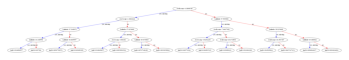

In [8]:
#XGBoost Visualizations
params = {"objective":"reg:linear",'colsample_bytree': 0.5,
          'learning_rate': 0.01, 'max_depth': 4, 'alpha': 1}
data_dmatrix = xgb.DMatrix(data=df_x,label=df_y)
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=9)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.show()

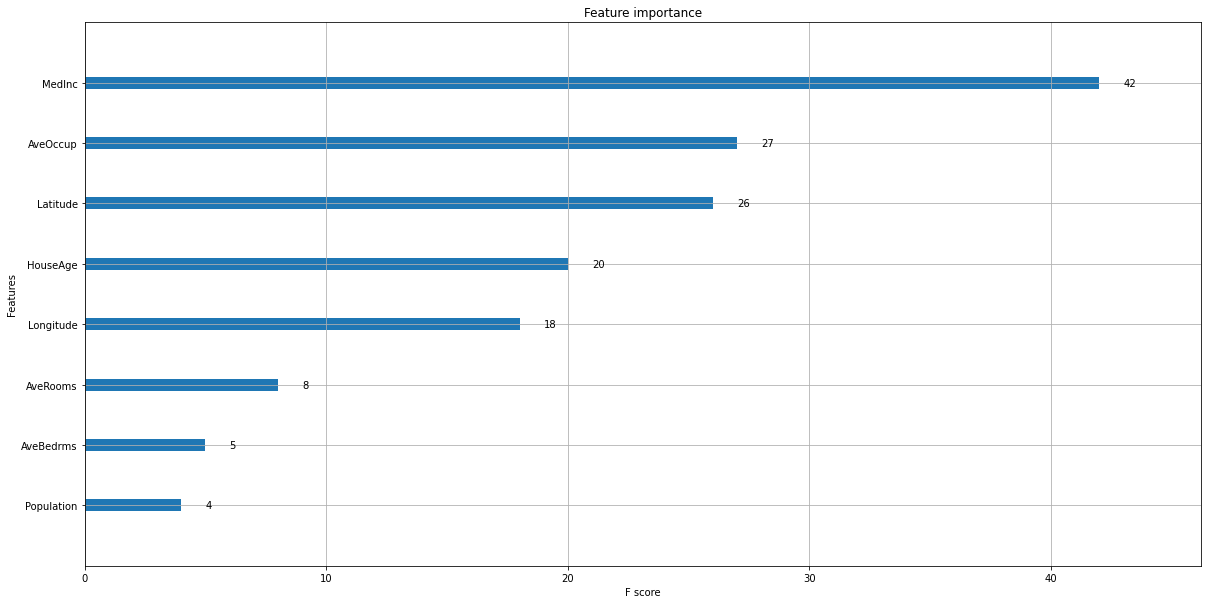

In [9]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.show()

**Interpretation:**

We split the data into training set and test set. We use the training set to build XGBoost model and then use the test set to get predicted value. The `MSE` between predicted value and actual value is 0.29, which is low. And the `Test Variance socre` is 0.77, which is close to 1. We also run gradient boosting model and get `MSE` is 0.28, `Test Variance socre` is 0.78. We can see that XGBoost and GradBoost are very close. The last graph gives us the importance of each paramter, and the higher the score, the more important the paramter is.